# Hello k-means clustering

In [1]:
# Prerequisites
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2


### Train k-mean clusterer on a dataset containing 5 blobs/clusters

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create sample data with 5 clusters
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
# cluster standard deviations
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)
# number of clusters
k = 5

k_means = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = k_means.fit_predict(X)

### Plot the data blobs

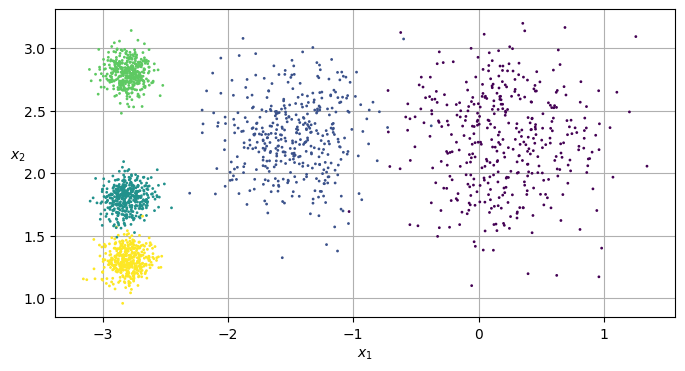

In [6]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

### Check centroids   

In [7]:
k_means.cluster_centers_

array([[-2.802,  1.552],
       [ 0.087,  2.584],
       [-1.469,  2.282],
       [-2.793,  2.796],
       [ 0.313,  1.968]])

### Plot

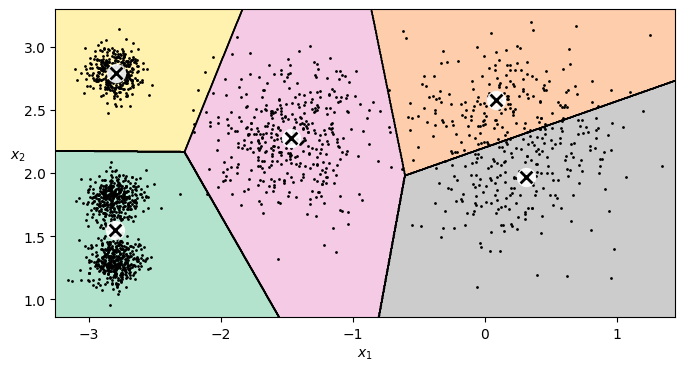

In [8]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(k_means, X)
plt.show()